# <font face = "微软雅黑" color = blue size = 6>实验名称</font>

## 时间数据可视化

# <font face = "微软雅黑" color = blue size = 6>实验目的</font>

## 通过该实验的实践，要求学生可以理解时间数据的含义，掌握Matplotlib和pyecharts的使用过程，能够熟练绘制常见的适合展示时间数据的图表。

# <font face = "微软雅黑" color = blue size = 6>实验背景</font>

## 时间数据是在日常生活和社会工作中十分常见的一种数据，它是通过将一系列时间点上的观测值按等时间间隔测量来获取的数据集合，比如商业活动中，服装公司的年销售量，日股票的收盘价格； 气象学中某城市的年降水量，月平均气温等等，因此对时间数据的研究存在于各行各业。

# <font face = "微软雅黑" color = blue size = 6>实验原理</font>

## 时间数据是在不同时间上收集到的数据，用于所描述现象随时间变化的情况。这类数据反映了某一事物、现象等随时间的变化状态或程度。

## 适合表达时间数据的图表有折线图、阶梯图、散点图、柱形图等。

# <font face = "微软雅黑" color = blue size = 6>实验环境</font>

## ubuntu 16.04

## Python 3.6.5

## pyecharts 0.5.11

## matplotlib 3.2.0

# <font face = "微软雅黑" color = blue size = 6>实验步骤</font>

## 2 环境准备，安装所需的库

## 2 安装pyecharts

In [1]:
!pip install pyecharts==0.5.11

^C


## 3 阶梯图

In [11]:
from pyecharts.charts import Line
from pyecharts import options as opts
line = Line()
line.add_xaxis(['1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'])
line.add_yaxis("邮票价格",[0.32,0.32,0.32,0.32,0.33,0.33,0.34,0.37,0.37,0.37,0.37,0.39,0.41,0.42,0.44])
line.set_global_opts(title_opts=opts.TitleOpts(title="美国邮票阶梯图"))
line.render(path='例图/1.阶梯图.html')

'D:\\jupyter file\\数据可视化与预处理\\例图\\1.阶梯图.html'

## 4 折线图

## 4.1 时间序列折线图

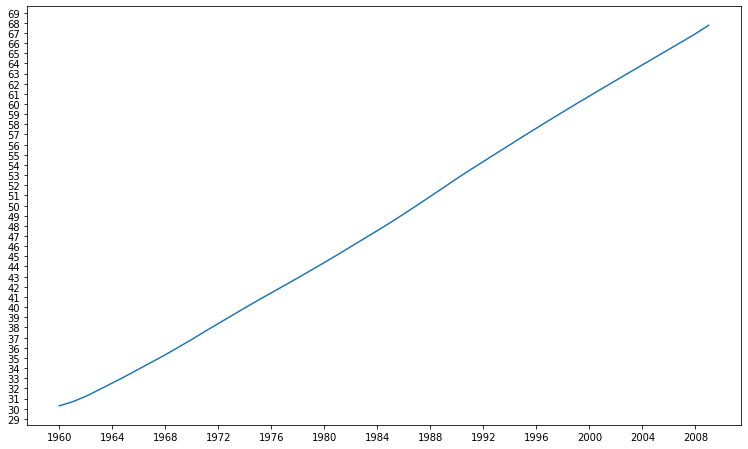

In [12]:
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams['figure.figsize']=(12.8,7.7)
filename = "数据/world-population.csv"
datax = []
datay = []
with open(filename) as f:
    reader = csv.reader(f)
    for datarow in reader:
        if reader.line_num != 1:
            datax.append(datarow[0])
            datay.append(round(int(datarow[1])/100000000,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(datax,datay)
plt.show()

## 4.2 带峰谷值标注的时间序列折线图

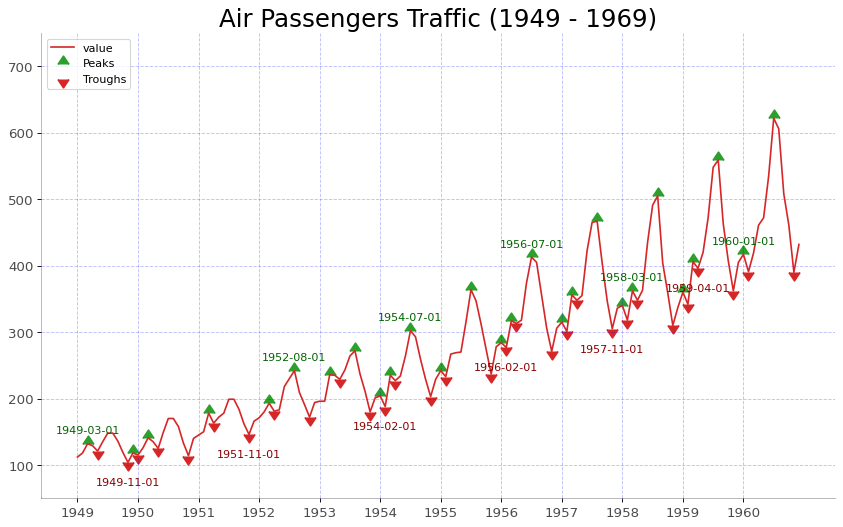

In [13]:
# 加载模块
import pandas as pd
import numpy as np
import matplotlib as mpl

# 数据导入
df = pd.read_csv("数据/AirPassengers.csv")
data = df['value'].values

# 差分法寻找峰谷值所在位置
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1
doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# 绘图及峰谷值标注装饰
plt.figure(figsize=(12.8,7.7), dpi= 80)
plt.plot('date', 'value', data=df, color='tab:red')
plt.scatter(df.date[peak_locations], df.value[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.value[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# 峰谷值文本设计
for t, p in zip(trough_locations[1::5], peak_locations[::5]):
    plt.text(df.date[p], df.value[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.value[t]-35, df.date[t], horizontalalignment='center', color='darkred')


# 图形装饰
plt.ylim(50, 750) #Y轴值域
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[0:4] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)#X轴刻度
plt.yticks(fontsize=12, alpha=.7)#Y轴刻度
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', linestyle = '--',color='b',alpha = 0.25)#网格设计

# 边框移除
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)

plt.legend(loc='upper left')

plt.show()

## 4.3 带副坐标轴的时间序列线图

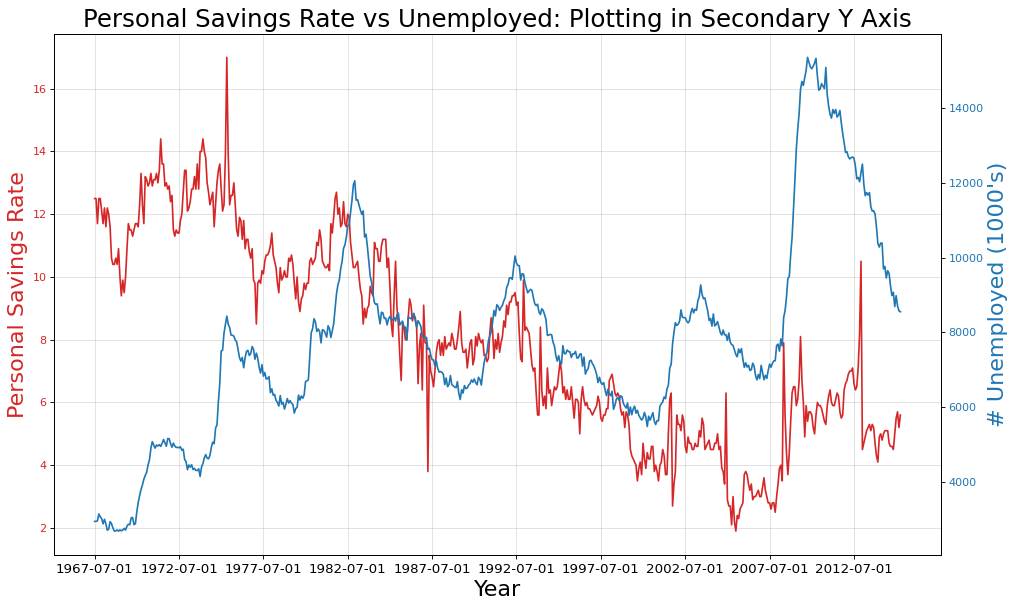

In [14]:
# 加载数据
df = pd.read_csv("数据/economics.csv")
x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# 绘制第一条曲线(主轴曲线)
fig, ax1 = plt.subplots(1,1,figsize=(12.8,7.7), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# 绘制第二条曲线 (副轴曲线)
ax2 = ax1.twinx()  # 生成副轴,并共享X轴
ax2.plot(x, y2, color='tab:blue')

# 绘图装饰
# 第一条曲线(主轴曲线)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# 第二条曲线(副轴曲线)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)

fig.tight_layout()#多图布局
plt.show()

## 5 拟合曲线

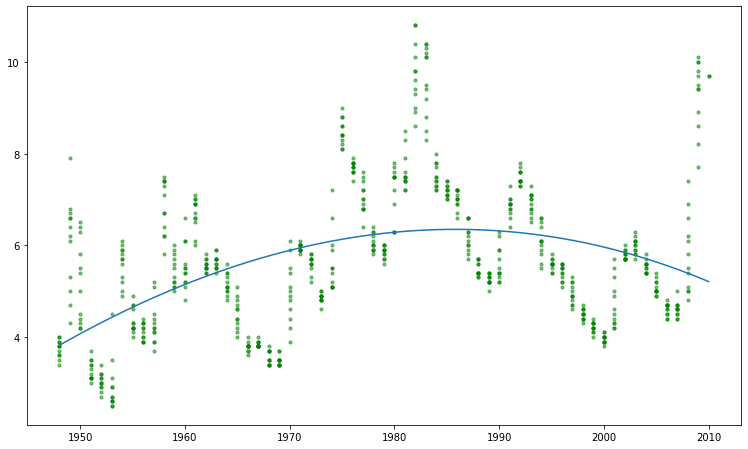

In [15]:
#加载模块
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys

#加载数据
filename = "数据/unemployment-rate-1948-2010.csv"
xa = []
ya = []

try:
    with open(filename) as f:
        reader = csv.reader(f)
        for datarow in reader:
            if reader.line_num != 1:
                ya.append(float(datarow[3]))
                xa.append(int(datarow[1]))
except csv.Error:
    print("Error reading csv file")
    sys.exit(-1)
plt.figure()
plt.scatter(xa[:], ya[:], s=10,c='g',marker='o',alpha=0.5)
poly = np.polyfit(xa, ya, deg = 3)#3阶多项式拟合

plt.plot(xa, np.polyval(poly, xa))

plt.show()

## 6 柱形图

In [16]:
#加载模块
from pyecharts.charts import Bar, Scatter3D
from pyecharts import options as opts
from pyecharts.charts import Page  #加载页面组件模块
import csv

page = Page()#创建页面对象  
bar = Bar()

#加载数据
filename = "数据/hot-dog-contest-winners.csv"
datax = []
datay = []

with open(filename) as f:
    reader = csv.reader(f)
    for datarow in reader:
        if reader.line_num != 1:
            datay.append(datarow[2])
            datax.append(datarow[0])
    
bar.add_xaxis(datax)
bar.add_yaxis('示例',datay)
bar.set_global_opts(title_opts=opts.TitleOpts(title="柱状图示例"))
page.add(bar)

page.render(path='例图/5.柱状图.html')

## 7 堆叠柱形图

In [17]:
#加载模块
from pyecharts.charts import Bar, Scatter3D
from pyecharts.charts import Page
from pyecharts import options as opts
import csv

#创建对象
page = Page()
bar = Bar()

#加载数据
filename = "数据/hot-dog-places.csv"
datax = []
datay = []
with open(filename) as f:
     reader = csv.reader(f)
     for datarow in reader:
         datax.append(datarow)
x= datax[0]
y1=datax[1]
y2=datax[2]
y3=datax[3]

#堆叠图设计
bar.add_xaxis(x)
bar.add_yaxis('A',y1)
bar.add_xaxis(datax)
bar.add_yaxis('B',y2)
bar.add_xaxis(datax)
bar.add_yaxis('C',y3)
bar.set_global_opts(title_opts=opts.TitleOpts(title="柱状图示例A"))#进行堆叠
bar.set_global_opts(title_opts=opts.TitleOpts(title="柱状图示例B"))#进行堆叠
bar.set_global_opts(title_opts=opts.TitleOpts(title="柱状图示例C"))#进行堆叠

page.add(bar)

page.render(path='例图/6.柱状堆叠图.html')

## 8 时间序列热力图

In [9]:
!pip install calmap


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 2560x1600 with 0 Axes>

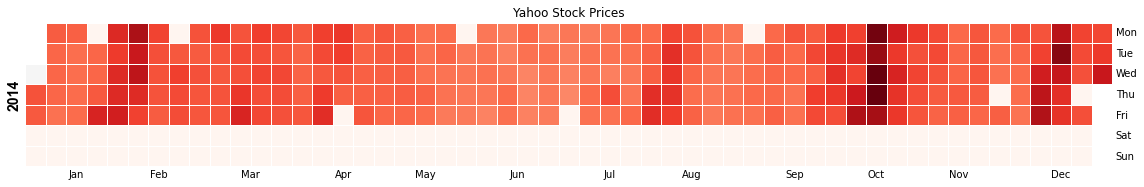

In [18]:
import matplotlib as mpl
import calmap

# 加载数据
df = pd.read_csv("数据/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# 绘图
plt.figure(figsize=(16,10), dpi= 160)
calmap.calendarplot(df.loc['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
plt.show()

# <font face = "微软雅黑" color = blue size = 6>实验总结</font>

## 在实验中，通过实践练习，提高学生使用matplotlib和pyecharts进行时间数据可视化的熟练程度，总结适合展示时间数据的图表，能够解释数据随时间变化的趋势。